# Using Python for Hypergraph Learning

**Tutorial for General Audience**

**Author:** M. Boudourides  
**Date:** October 15, 2025

---

## Welcome!

In this tutorial, we will explore **hypergraphs** and how to use **PyTorch** to learn from them. We'll focus on making these concepts accessible to everyone, regardless of your background in computer science.

By the end of this session, you will:
- Understand what hypergraphs are and why they matter
- Learn how to represent hypergraphs in Python
- See how PyTorch can be used for hypergraph learning
- Get introduced to the **CHESHIRE algorithm** for hyperlink prediction

Let's get started!

## Part 1: From Social Networks to Hypergraphs

### The Social Networks You Already Know

Think about social media platforms like Facebook or Twitter. These can be represented as **graphs**:
- **Nodes** (or vertices) represent people
- **Edges** (or links) represent friendships or connections

This works well for **pairwise relationships** (connections between two people).

### The Problem: Group Interactions

But what about:
- A group chat with 5 friends?
- A research team working on a project?
- A family gathering?
- Students enrolled in the same course?

These are **group interactions** that involve more than two people at once. Simple graphs cannot naturally represent these relationships.

### Enter Hypergraphs!

A **hypergraph** is a generalization of a graph where:
- **Nodes** still represent entities (people, objects, etc.)
- **Hyperedges** can connect **any number of nodes** (not just two)

This makes hypergraphs perfect for modeling complex, multi-way relationships!

In [1]:
# Let's install the necessary packages
# Uncomment and run this cell if you need to install packages

# !pip install torch numpy matplotlib networkx hypernetx
# !pip install torch-geometric

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
from collections import defaultdict

print("Libraries imported successfully!")

Libraries imported successfully!


## Part 2: Understanding Hypergraphs with Examples

### Example: University Clubs

Imagine a university with students and clubs:
- **Nodes**: Students (Alice, Bob, Charlie, David, Eve)
- **Hyperedges**: Clubs (each club contains multiple students)

Let's represent this as a hypergraph in Python!

In [3]:
# Define a hypergraph as a dictionary
# Keys are hyperedges (clubs), values are sets of nodes (students)

university_hypergraph = {
    'Sci-Fi Club': {'Alice', 'Bob', 'Charlie'},
    'Comedy Club': {'Bob', 'David', 'Eve'},
    'Film Noir Club': {'Alice', 'Charlie', 'Eve'},
    'Documentary Club': {'David', 'Eve'}
}

print("University Hypergraph:")
for club, members in university_hypergraph.items():
    print(f"{club}: {members}")

University Hypergraph:
Sci-Fi Club: {'Charlie', 'Bob', 'Alice'}
Comedy Club: {'Bob', 'David', 'Eve'}
Film Noir Club: {'Charlie', 'Alice', 'Eve'}
Documentary Club: {'David', 'Eve'}


### Visualizing the Hypergraph

Let's create a simple visualization. We'll use a **bipartite graph** representation where we show both nodes (students) and hyperedges (clubs).

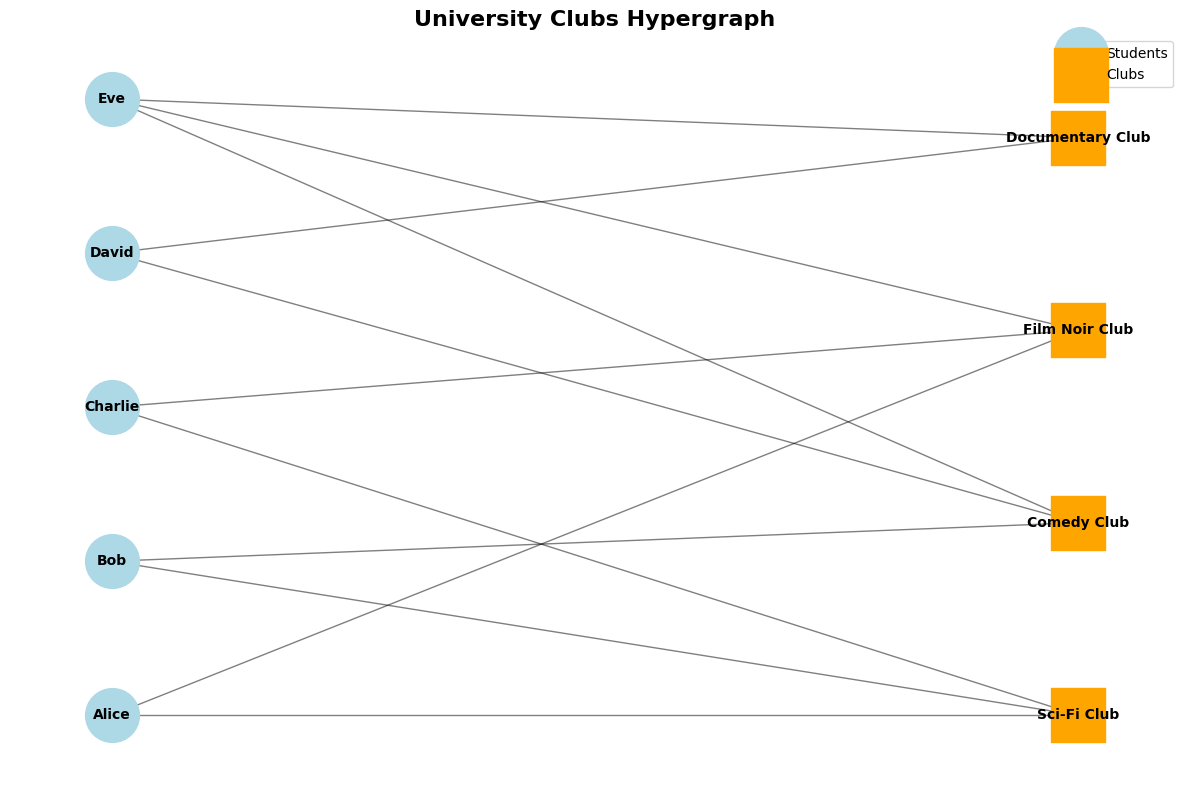

In [4]:
def visualize_hypergraph(hypergraph, title="Hypergraph Visualization"):
    """
    Visualize a hypergraph using a bipartite representation.
    
    Args:
        hypergraph: Dictionary with hyperedges as keys and sets of nodes as values
        title: Title for the plot
    """
    # Create a bipartite graph
    B = nx.Graph()
    
    # Add nodes and hyperedges
    nodes = set()
    for hyperedge, node_set in hypergraph.items():
        nodes.update(node_set)
        for node in node_set:
            B.add_edge(node, hyperedge)
    
    # Create layout
    pos = {}
    
    # Position nodes (students) on the left
    node_list = sorted(list(nodes))
    for i, node in enumerate(node_list):
        pos[node] = (0, i)
    
    # Position hyperedges (clubs) on the right
    hyperedge_list = list(hypergraph.keys())
    for i, hyperedge in enumerate(hyperedge_list):
        pos[hyperedge] = (2, i * len(node_list) / len(hyperedge_list))
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    
    # Draw nodes (students) in blue
    nx.draw_networkx_nodes(B, pos, nodelist=node_list, 
                          node_color='lightblue', node_size=1500, label='Students')
    
    # Draw hyperedges (clubs) in orange
    nx.draw_networkx_nodes(B, pos, nodelist=hyperedge_list, 
                          node_color='orange', node_size=1500, 
                          node_shape='s', label='Clubs')
    
    # Draw edges
    nx.draw_networkx_edges(B, pos, alpha=0.5)
    
    # Draw labels
    nx.draw_networkx_labels(B, pos, font_size=10, font_weight='bold')
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.legend(scatterpoints=1, loc='upper right')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize our university hypergraph
visualize_hypergraph(university_hypergraph, "University Clubs Hypergraph")

### Key Observation

Notice how:
- Each **student** (blue circle) can belong to multiple **clubs** (orange squares)
- Each **club** connects multiple **students**
- This represents the **group structure** naturally!

In a traditional graph, we would have to connect every pair of students in the same club, which would be messy and lose the group information.

### Advanced Hypergraph Visualization with HyperNetX

While our bipartite representation is useful, there's a specialized library called **HyperNetX** that provides more sophisticated hypergraph visualizations.

HyperNetX was developed by the Pacific Northwest National Laboratory specifically for hypergraph analysis and visualization.

In [5]:
# Install HyperNetX if needed
# Uncomment the line below if you need to install it
# !pip install hypernetx

import hypernetx as hnx
print(f"HyperNetX version: {hnx.__version__}")

HyperNetX version: 2.4.0


### Creating a Hypergraph with HyperNetX

HyperNetX uses a similar dictionary representation to what we've been using. Let's create our university clubs hypergraph using HyperNetX.

In [6]:
# Create a HyperNetX hypergraph from our dictionary
H_hnx = hnx.Hypergraph(university_hypergraph)

print("HyperNetX Hypergraph Summary:")
print(f"Number of nodes: {len(H_hnx.nodes)}")
print(f"Number of hyperedges: {len(H_hnx.edges)}")
print(f"\nNodes: {sorted(H_hnx.nodes)}")
print(f"\nHyperedges: {list(list(H_hnx.edges))}")

HyperNetX Hypergraph Summary:
Number of nodes: 5
Number of hyperedges: 4

Nodes: ['Alice', 'Bob', 'Charlie', 'David', 'Eve']

Hyperedges: ['Sci-Fi Club', 'Comedy Club', 'Film Noir Club', 'Documentary Club']


### Visualizing with HyperNetX

HyperNetX provides several visualization styles. Let's explore them!

Visualization 1: Default HyperNetX Style



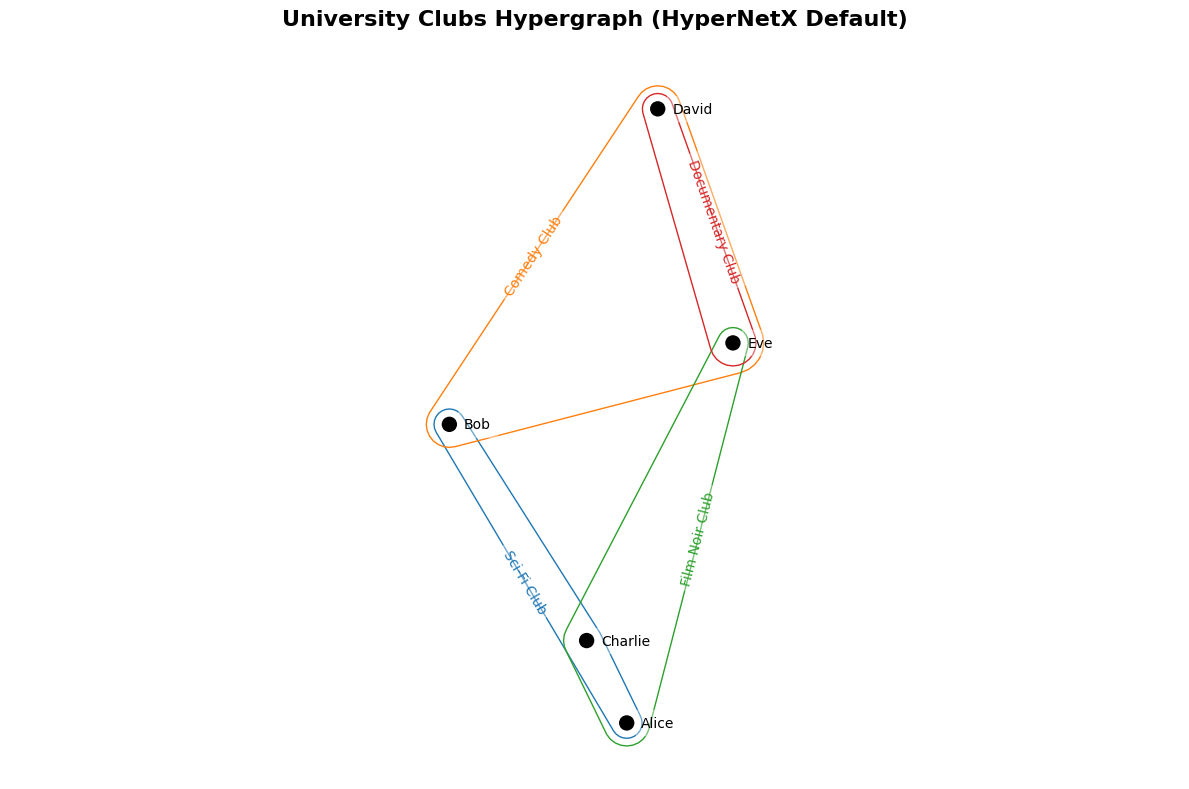

In this visualization:
  - Circles represent students (nodes)
  - Colored regions represent clubs (hyperedges)
  - Each club encompasses all its members


In [7]:
# Visualization 1: Default HyperNetX visualization
print("Visualization 1: Default HyperNetX Style\n")

fig, ax = plt.subplots(figsize=(12, 8))
hnx.draw(H_hnx, 
         with_node_labels=True,
         with_edge_labels=True,
         ax=ax)
plt.title('University Clubs Hypergraph (HyperNetX Default)', 
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("In this visualization:")
print("  - Circles represent students (nodes)")
print("  - Colored regions represent clubs (hyperedges)")
print("  - Each club encompasses all its members")

Visualization 2: Bipartite Layout



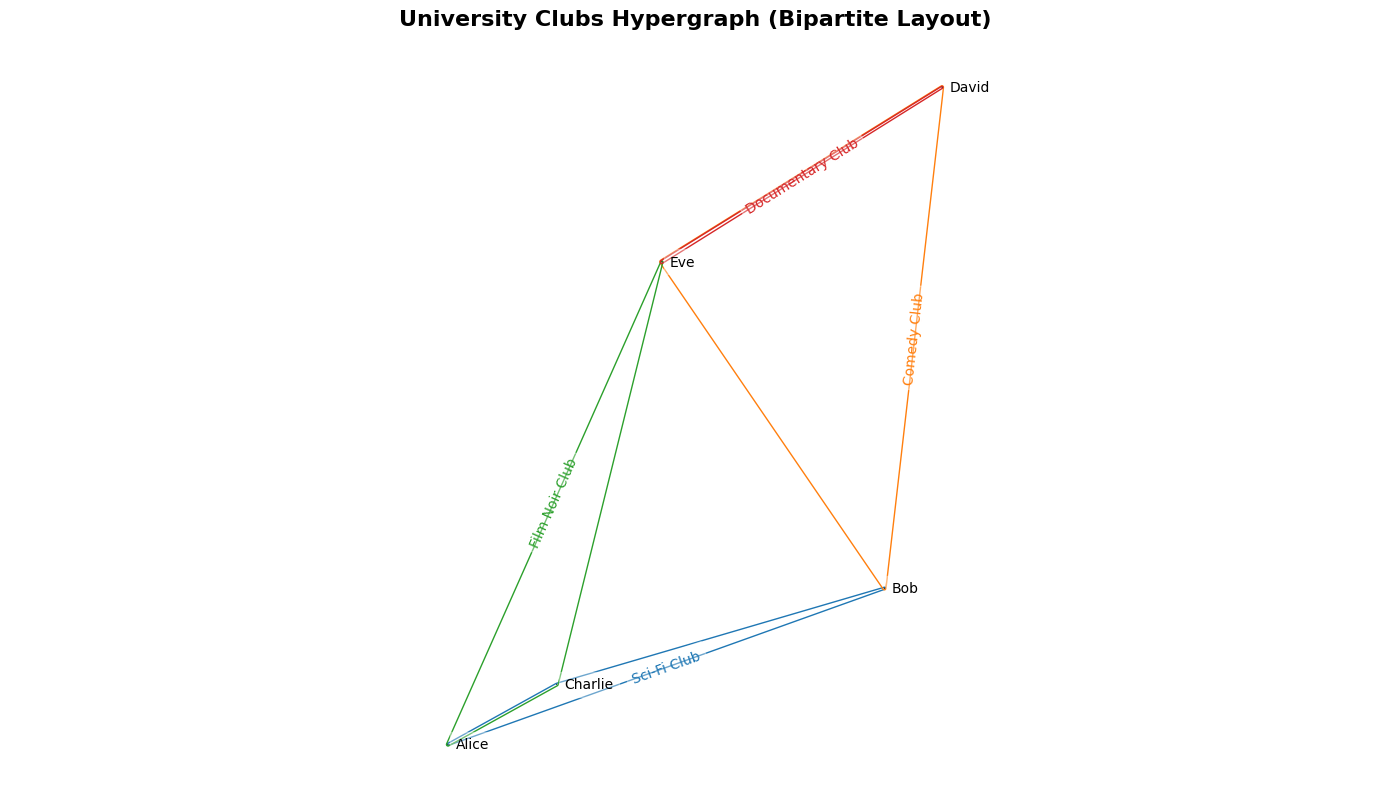

This layout separates:
  - Nodes (students) on one side
  - Hyperedges (clubs) on the other side
  - Making the bipartite structure explicit


In [8]:
# Visualization 2: Bipartite layout (similar to our earlier visualization)
print("Visualization 2: Bipartite Layout\n")

fig, ax = plt.subplots(figsize=(14, 8))
hnx.draw(H_hnx,
         with_node_labels=True,
         with_edge_labels=True,
         node_radius=0.05,
         ax=ax)
plt.title('University Clubs Hypergraph (Bipartite Layout)', 
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("This layout separates:")
print("  - Nodes (students) on one side")
print("  - Hyperedges (clubs) on the other side")
print("  - Making the bipartite structure explicit")

Visualization 3: Customized Visualization



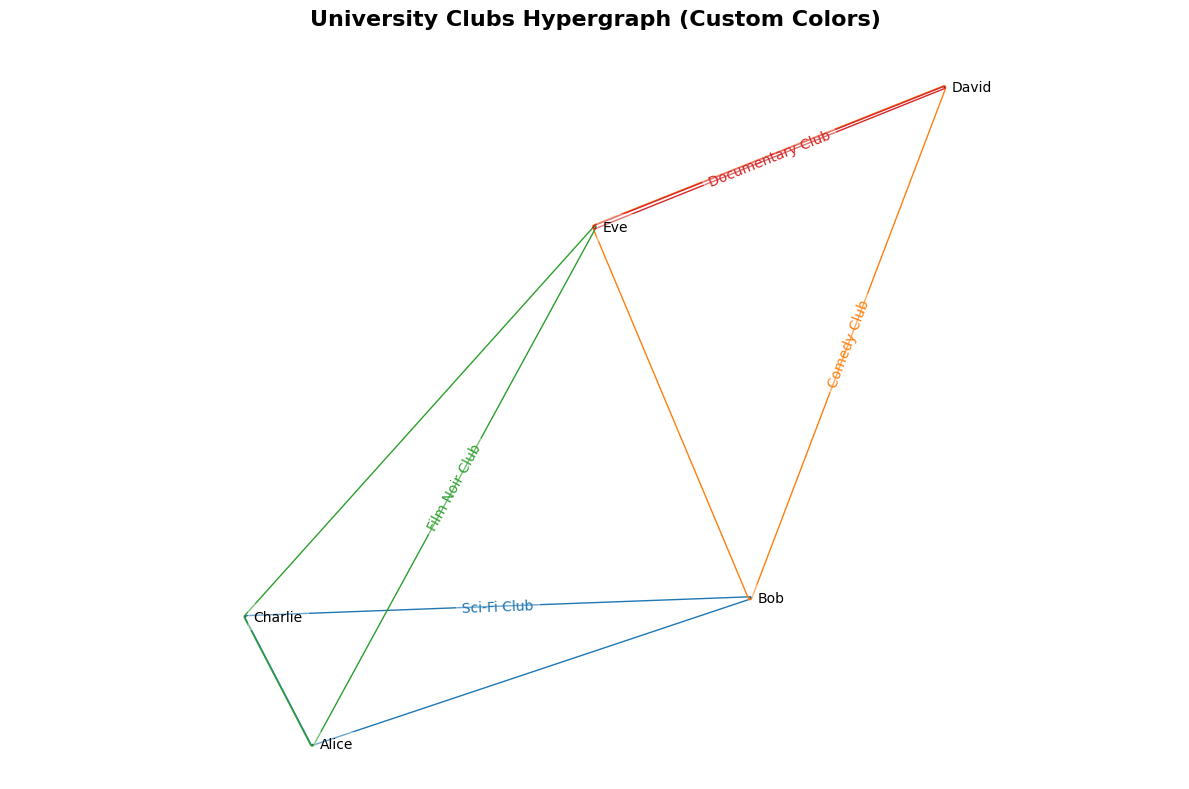

Custom colors help distinguish different clubs visually!


In [9]:
# Visualization 3: Customized colors and styles
print("Visualization 3: Customized Visualization\n")

fig, ax = plt.subplots(figsize=(12, 8))

# Define custom colors for nodes and edges
node_colors = {node: 'lightblue' for node in H_hnx.nodes}
edge_colors = {
    'Sci-Fi Club': 'lightcoral',
    'Comedy Club': 'lightgreen',
    'Film Noir Club': 'lightyellow',
    'Documentary Club': 'plum'
}

hnx.draw(H_hnx,
         with_node_labels=True,
         with_edge_labels=True,
         node_radius=0.05,
         ax=ax)

plt.title('University Clubs Hypergraph (Custom Colors)', 
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Custom colors help distinguish different clubs visually!")

### Analyzing the Hypergraph with HyperNetX

HyperNetX also provides tools for analyzing hypergraph properties.

In [10]:
# Analyze node properties
print("Node Analysis:\n")
print("Node Degrees (number of clubs each student belongs to):")
for node in sorted(H_hnx.nodes):
    degree = H_hnx.degree(node)
    clubs = [edge for edge in H_hnx.edges if node in H_hnx.edges[edge]]
    print(f"  {node}: {degree} clubs - {clubs}")

print("\n" + "="*60)

# Analyze hyperedge properties
print("\nHyperedge Analysis:\n")
print("Hyperedge Sizes (number of students in each club):")
for edge in H_hnx.edges:
    size = len(H_hnx.edges[edge])
    members = sorted(H_hnx.edges[edge])
    print(f"  {edge}: {size} students - {members}")

Node Analysis:

Node Degrees (number of clubs each student belongs to):
  Alice: 2 clubs - ['Sci-Fi Club', 'Film Noir Club']
  Bob: 2 clubs - ['Sci-Fi Club', 'Comedy Club']
  Charlie: 2 clubs - ['Sci-Fi Club', 'Film Noir Club']
  David: 2 clubs - ['Comedy Club', 'Documentary Club']
  Eve: 3 clubs - ['Comedy Club', 'Film Noir Club', 'Documentary Club']


Hyperedge Analysis:

Hyperedge Sizes (number of students in each club):
  Sci-Fi Club: 3 students - ['Alice', 'Bob', 'Charlie']
  Comedy Club: 3 students - ['Bob', 'David', 'Eve']
  Film Noir Club: 3 students - ['Alice', 'Charlie', 'Eve']
  Documentary Club: 2 students - ['David', 'Eve']


In [11]:
# Find node neighbors (students who share clubs)
print("Node Neighbors (students who share at least one club):\n")

for node in sorted(H_hnx.nodes):
    # Get all hyperedges this node belongs to
    node_edges = [e for e in H_hnx.edges if node in H_hnx.edges[e]]
    
    # Get all neighbors (other nodes in the same hyperedges)
    neighbors = set()
    for edge in node_edges:
        neighbors.update(H_hnx.edges[edge])
    neighbors.discard(node)  # Remove the node itself
    
    print(f"  {node}: {sorted(neighbors)}")

Node Neighbors (students who share at least one club):

  Alice: ['Bob', 'Charlie', 'Eve']
  Bob: ['Alice', 'Charlie', 'David', 'Eve']
  Charlie: ['Alice', 'Bob', 'Eve']
  David: ['Bob', 'Eve']
  Eve: ['Alice', 'Bob', 'Charlie', 'David']


### Creating a Larger Hypergraph Example

Let's create a more complex hypergraph to see how HyperNetX handles larger structures.

In [12]:
# Create a larger collaboration network
research_hypergraph = {
    'AI_Paper_1': {'Prof_Smith', 'Dr_Johnson', 'PhD_Lee', 'PhD_Chen'},
    'Networks_Paper_1': {'Prof_Smith', 'Dr_Brown', 'PhD_Garcia'},
    'Sociology_Paper_1': {'Dr_Brown', 'Prof_Davis', 'PhD_Martinez', 'PhD_Wilson'},
    'DataScience_Paper_1': {'Dr_Johnson', 'PhD_Chen', 'Dr_Taylor'},
    'Interdisciplinary_Paper': {'Prof_Smith', 'Prof_Davis', 'Dr_Taylor', 'PhD_Lee'},
    'ML_Paper_1': {'Dr_Johnson', 'PhD_Lee', 'PhD_Chen'},
    'SocialNetworks_Paper': {'Prof_Davis', 'Dr_Brown', 'PhD_Garcia', 'PhD_Wilson'},
}

# Create HyperNetX hypergraph
H_research = hnx.Hypergraph(research_hypergraph)

print("Research Collaboration Network:")
print(f"  Researchers: {len(H_research.nodes)}")
print(f"  Papers: {len(H_research.edges)}")
print(f"  Total collaborations: {sum(len(H_research.edges[e]) for e in H_research.edges)}")

Research Collaboration Network:
  Researchers: 10
  Papers: 7
  Total collaborations: 25


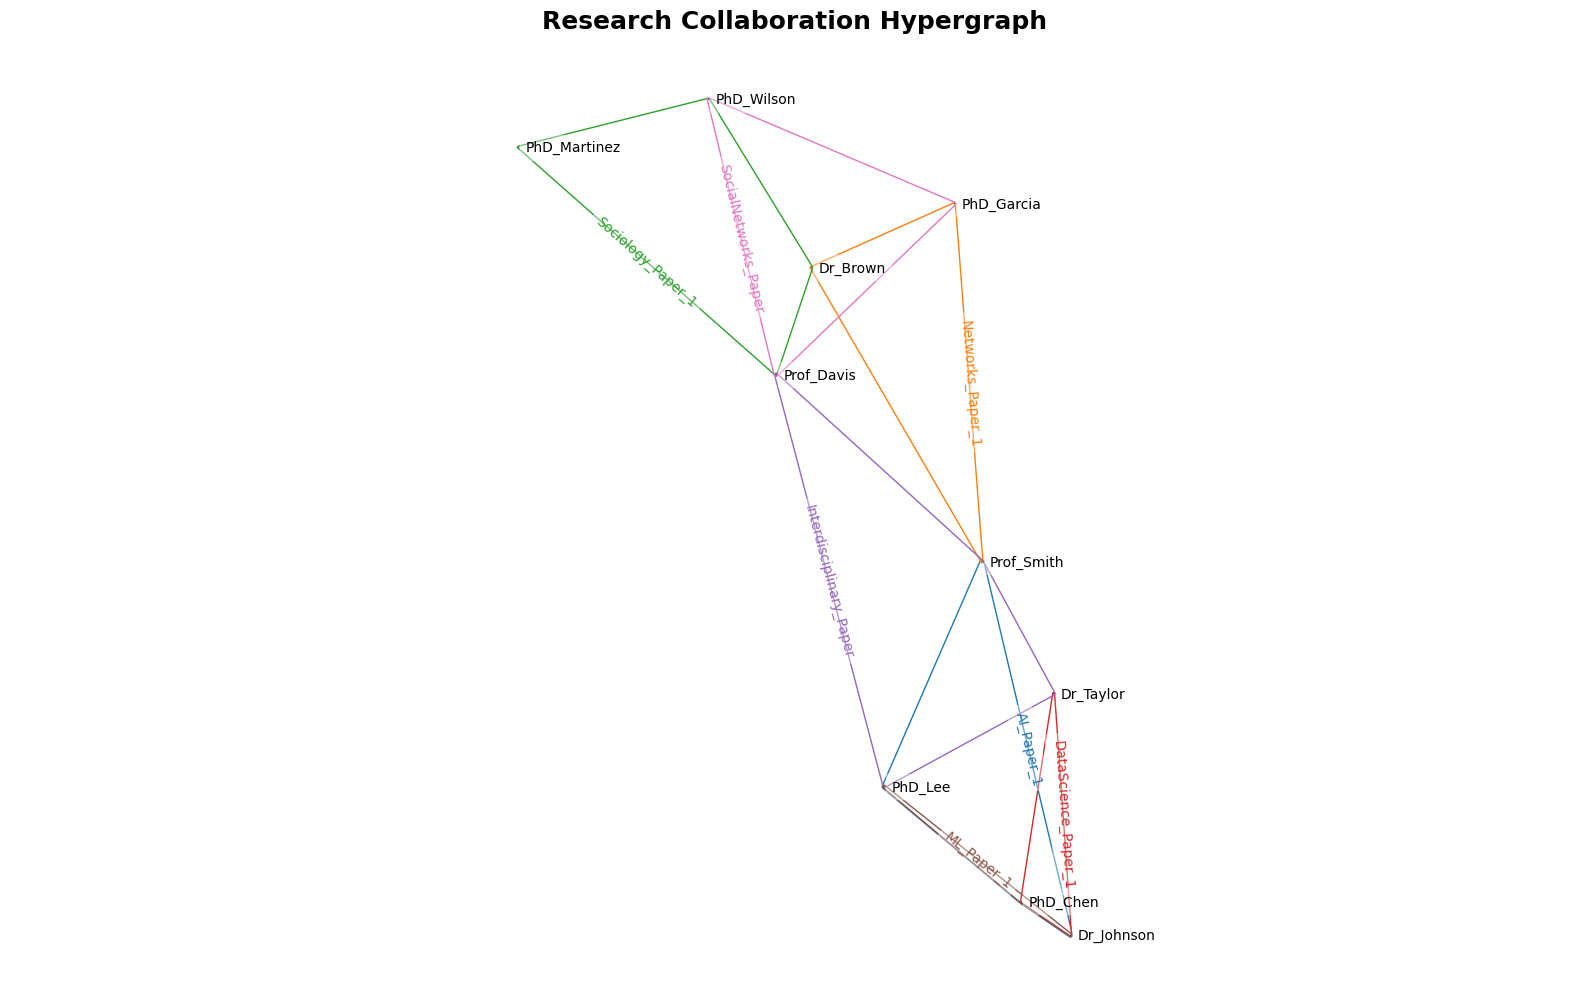


This visualization shows:
  - Complex collaboration patterns
  - Researchers who bridge different research areas
  - Overlapping research communities


In [13]:
# Visualize the research collaboration network
fig, ax = plt.subplots(figsize=(16, 10))

hnx.draw(H_research,
         with_node_labels=True,
         with_edge_labels=True,
         node_radius=0.04,
         ax=ax)

plt.title('Research Collaboration Hypergraph', 
         fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nThis visualization shows:")
print("  - Complex collaboration patterns")
print("  - Researchers who bridge different research areas")
print("  - Overlapping research communities")

In [14]:
# Find the most collaborative researchers
print("Most Collaborative Researchers:\n")

researcher_degrees = [(node, H_research.degree(node)) for node in H_research.nodes]
researcher_degrees.sort(key=lambda x: x[1], reverse=True)

for researcher, degree in researcher_degrees:
    papers = [edge for edge in H_research.edges if researcher in H_research.edges[edge]]
    print(f"  {researcher}: {degree} papers")
    print(f"    Papers: {papers}")
    print()

Most Collaborative Researchers:

  PhD_Chen: 3 papers
    Papers: ['AI_Paper_1', 'DataScience_Paper_1', 'ML_Paper_1']

  PhD_Lee: 3 papers
    Papers: ['AI_Paper_1', 'Interdisciplinary_Paper', 'ML_Paper_1']

  Prof_Smith: 3 papers
    Papers: ['AI_Paper_1', 'Networks_Paper_1', 'Interdisciplinary_Paper']

  Dr_Johnson: 3 papers
    Papers: ['AI_Paper_1', 'DataScience_Paper_1', 'ML_Paper_1']

  Dr_Brown: 3 papers
    Papers: ['Networks_Paper_1', 'Sociology_Paper_1', 'SocialNetworks_Paper']

  Prof_Davis: 3 papers
    Papers: ['Sociology_Paper_1', 'Interdisciplinary_Paper', 'SocialNetworks_Paper']

  PhD_Garcia: 2 papers
    Papers: ['Networks_Paper_1', 'SocialNetworks_Paper']

  PhD_Wilson: 2 papers
    Papers: ['Sociology_Paper_1', 'SocialNetworks_Paper']

  Dr_Taylor: 2 papers
    Papers: ['DataScience_Paper_1', 'Interdisciplinary_Paper']

  PhD_Martinez: 1 papers
    Papers: ['Sociology_Paper_1']



### Why HyperNetX is Useful

HyperNetX provides several advantages:

1. **Specialized Visualizations**: Designed specifically for hypergraphs, not adapted from graph tools
2. **Built-in Analysis**: Provides functions for computing hypergraph properties
3. **Flexible Layouts**: Multiple layout algorithms optimized for hypergraphs
4. **Integration**: Works well with other Python scientific libraries
5. **Active Development**: Maintained by researchers who use hypergraphs

### Comparison: NetworkX vs HyperNetX

| Feature | NetworkX (our bipartite approach) | HyperNetX |
|---------|-----------------------------------|------------|
| **Purpose** | General graphs | Specialized for hypergraphs |
| **Visualization** | Adapted from graph viz | Native hypergraph viz |
| **Learning Curve** | Familiar to many | Requires learning new API |
| **Flexibility** | Very flexible | Optimized for hypergraphs |
| **Analysis Tools** | Graph-based | Hypergraph-specific |

**Recommendation**: Use HyperNetX when working extensively with hypergraphs. Use NetworkX for quick prototypes or when you need general graph algorithms.

## Part 3: Representing Hypergraphs for Machine Learning

### The Incidence Matrix

To work with hypergraphs in machine learning, we need a mathematical representation. The most common one is the **incidence matrix**.

An incidence matrix $H$ is a matrix where:
- **Rows** represent nodes (students)
- **Columns** represent hyperedges (clubs)
- $H[i, j] = 1$ if node $i$ belongs to hyperedge $j$, otherwise $H[i, j] = 0$

Let's create this for our university example!

In [15]:
def hypergraph_to_incidence_matrix(hypergraph):
    """
    Convert a hypergraph to an incidence matrix.
    
    Args:
        hypergraph: Dictionary with hyperedges as keys and sets of nodes as values
        
    Returns:
        H: Incidence matrix (numpy array)
        node_list: List of nodes (for indexing)
        hyperedge_list: List of hyperedges (for indexing)
    """
    # Get all unique nodes
    nodes = set()
    for node_set in hypergraph.values():
        nodes.update(node_set)
    
    node_list = sorted(list(nodes))
    hyperedge_list = list(hypergraph.keys())
    
    # Create node to index mapping
    node_to_idx = {node: idx for idx, node in enumerate(node_list)}
    
    # Initialize incidence matrix
    H = np.zeros((len(node_list), len(hyperedge_list)))
    
    # Fill the incidence matrix
    for j, (hyperedge, node_set) in enumerate(hypergraph.items()):
        for node in node_set:
            i = node_to_idx[node]
            H[i, j] = 1
    
    return H, node_list, hyperedge_list

# Create incidence matrix
H, nodes, clubs = hypergraph_to_incidence_matrix(university_hypergraph)

print("Incidence Matrix:")
print("\nNodes (rows):", nodes)
print("Clubs (columns):", clubs)
print("\nMatrix:")
print(H.astype(int))

Incidence Matrix:

Nodes (rows): ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
Clubs (columns): ['Sci-Fi Club', 'Comedy Club', 'Film Noir Club', 'Documentary Club']

Matrix:
[[1 0 1 0]
 [1 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 1 1]]


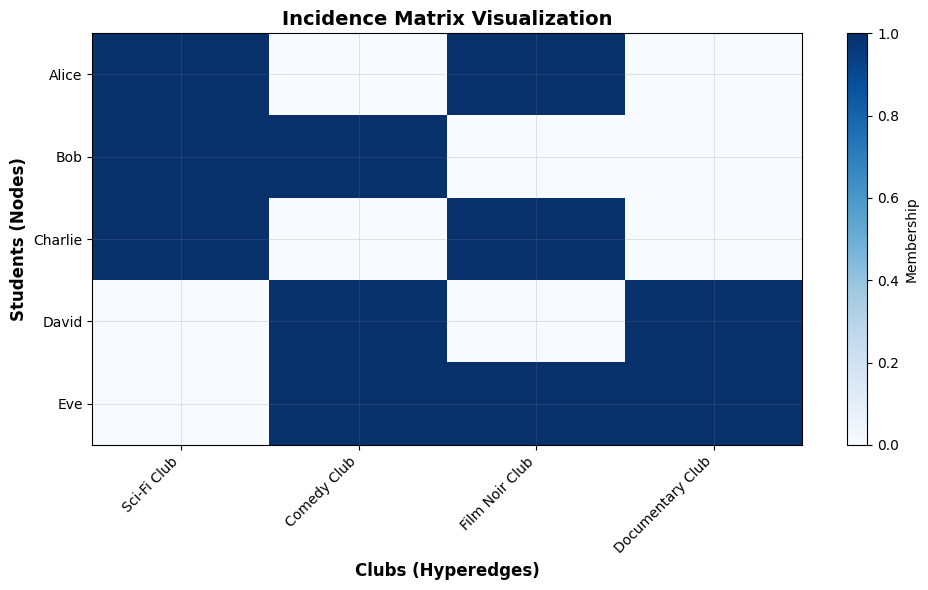

In [16]:
# Visualize the incidence matrix
plt.figure(figsize=(10, 6))
plt.imshow(H, cmap='Blues', aspect='auto')
plt.colorbar(label='Membership')
plt.xlabel('Clubs (Hyperedges)', fontsize=12, fontweight='bold')
plt.ylabel('Students (Nodes)', fontsize=12, fontweight='bold')
plt.title('Incidence Matrix Visualization', fontsize=14, fontweight='bold')
plt.xticks(range(len(clubs)), clubs, rotation=45, ha='right')
plt.yticks(range(len(nodes)), nodes)

# Add grid
plt.grid(True, which='both', color='gray', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

### Understanding the Matrix

Each **1** (dark blue) in the matrix means that a student belongs to a club. For example:
- Alice belongs to the Sci-Fi Club and Film Noir Club
- Bob belongs to the Sci-Fi Club and Comedy Club
- And so on...

This matrix is the foundation for hypergraph learning!

## Part 3.5: Understanding Tensors in PyTorch

Before we dive into PyTorch for hypergraph learning, let's understand what **tensors** are. This is a fundamental concept that will help you understand how PyTorch works.

### What is a Tensor?

A **tensor** is a generalization of familiar mathematical objects:

| Dimension | Name | Example | Shape |
|-----------|------|---------|-------|
| 0D | **Scalar** | A single number: `5` | `()` |
| 1D | **Vector** | A list of numbers: `[1, 2, 3]` | `(3,)` |
| 2D | **Matrix** | A table of numbers (like our incidence matrix) | `(5, 4)` |
| 3D+ | **Tensor** | Multi-dimensional arrays (e.g., a video: width × height × time) | `(width, height, time)` |

### Why Tensors Matter

In machine learning:
- **Data** is represented as tensors (images, text, graphs, etc.)
- **Neural network operations** work on tensors
- **GPUs** are optimized for tensor operations, making computations fast

Think of tensors as **containers for data** that can be efficiently processed by computers.

### A Real-World Analogy

- **Scalar (0D)**: The temperature today: 22°C
- **Vector (1D)**: Temperatures for each day of the week: [20, 22, 21, 23, 24, 22, 20]
- **Matrix (2D)**: Temperatures for each day of the week across 4 weeks
- **Tensor (3D)**: Temperatures for each day, across weeks, in different cities

### Tensors in Action: A Non-Trivial Example

Let's work with a realistic example related to our hypergraph: representing student features across multiple time periods.

In [17]:
import torch

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}\n")

# Example: Student features over time
# Let's say we track 5 students, each with 4 features (interests), over 3 semesters

# Create a 3D tensor: (time_periods, num_students, num_features)
torch.manual_seed(42)
student_features_over_time = torch.randn(3, 5, 4)

print("Student Features Over Time (3D Tensor):")
print(f"Shape: {student_features_over_time.shape}")
print(f"  - 3 time periods (semesters)")
print(f"  - 5 students")
print(f"  - 4 features per student\n")

print("First semester data:")
print(student_features_over_time[0])  # All students in semester 1
print("\nFirst student across all semesters:")
print(student_features_over_time[:, 0, :])  # Student 0 over time

PyTorch version: 2.2.2
CUDA available: False

Student Features Over Time (3D Tensor):
Shape: torch.Size([3, 5, 4])
  - 3 time periods (semesters)
  - 5 students
  - 4 features per student

First semester data:
tensor([[ 1.9269,  1.4873,  0.9007, -2.1055],
        [ 0.6784, -1.2345, -0.0431, -1.6047],
        [-0.7521,  1.6487, -0.3925, -1.4036],
        [-0.7279, -0.5594, -0.7688,  0.7624],
        [ 1.6423, -0.1596, -0.4974,  0.4396]])

First student across all semesters:
tensor([[ 1.9269,  1.4873,  0.9007, -2.1055],
        [-0.7581,  1.0783,  0.8008,  1.6806],
        [-1.5576,  0.9956, -0.8798, -0.6011]])


### Non-Trivial Tensor Operations for Hypergraph Learning

Let's see some operations that are actually used in hypergraph neural networks!

In [18]:
# Convert our incidence matrix to a PyTorch tensor
H_tensor = torch.FloatTensor(H)
print("Incidence Matrix as Tensor:")
print(f"Shape: {H_tensor.shape} (5 students × 4 clubs)\n")

# Operation 1: Compute node degrees (how many clubs each student belongs to)
node_degrees = H_tensor.sum(dim=1)  # Sum across columns (clubs)
print("Node Degrees (clubs per student):")
for i, student in enumerate(nodes):
    print(f"  {student}: {int(node_degrees[i])} clubs")

# Operation 2: Compute hyperedge sizes (how many students in each club)
hyperedge_sizes = H_tensor.sum(dim=0)  # Sum across rows (students)
print("\nHyperedge Sizes (students per club):")
for i, club in enumerate(clubs):
    print(f"  {club}: {int(hyperedge_sizes[i])} students")

Incidence Matrix as Tensor:
Shape: torch.Size([5, 4]) (5 students × 4 clubs)

Node Degrees (clubs per student):
  Alice: 2 clubs
  Bob: 2 clubs
  Charlie: 2 clubs
  David: 2 clubs
  Eve: 3 clubs

Hyperedge Sizes (students per club):
  Sci-Fi Club: 3 students
  Comedy Club: 3 students
  Film Noir Club: 3 students
  Documentary Club: 2 students


In [19]:
# Operation 3: Matrix multiplication for message passing
# This is the core operation in hypergraph neural networks!

# Create random node features
num_students = H_tensor.shape[0]
feature_dim = 4
X = torch.randn(num_students, feature_dim)

print("Node Features (X):")
print(f"Shape: {X.shape}\n")

# Aggregate node features to hyperedges: H^T @ X
# This means: each club gets the sum of its members' features
hyperedge_features = torch.matmul(H_tensor.T, X)
print("Hyperedge Features (aggregated from nodes):")
print(f"Shape: {hyperedge_features.shape}")
print(f"Each club now has a {feature_dim}-dimensional feature vector\n")

# Aggregate hyperedge features back to nodes: H @ hyperedge_features
# This means: each student gets information from all their clubs
X_updated = torch.matmul(H_tensor, hyperedge_features)
print("Updated Node Features (aggregated from hyperedges):")
print(f"Shape: {X_updated.shape}")
print("\nThis is the essence of message passing in hypergraph neural networks!")

Node Features (X):
Shape: torch.Size([5, 4])

Hyperedge Features (aggregated from nodes):
Shape: torch.Size([4, 4])
Each club now has a 4-dimensional feature vector

Updated Node Features (aggregated from hyperedges):
Shape: torch.Size([5, 4])

This is the essence of message passing in hypergraph neural networks!


In [20]:
# Operation 4: Broadcasting and element-wise operations
# Normalize features by node degrees

print("Before normalization:")
print(f"X_updated[0] (Alice): {X_updated[0][:2]}...")  # Show first 2 features

# Reshape node_degrees for broadcasting: (5,) -> (5, 1)
node_degrees_reshaped = node_degrees.unsqueeze(1)
print(f"\nNode degrees shape: {node_degrees.shape}")
print(f"Reshaped for broadcasting: {node_degrees_reshaped.shape}")

# Normalize: divide each student's features by their number of clubs
X_normalized = X_updated / (node_degrees_reshaped + 1e-8)  # Add small value to avoid division by zero

print(f"\nAfter normalization:")
print(f"X_normalized[0] (Alice): {X_normalized[0][:2]}...")
print("\nNormalization ensures students in many clubs don't dominate!")

Before normalization:
X_updated[0] (Alice): tensor([-0.5690,  0.6394])...

Node degrees shape: torch.Size([5])
Reshaped for broadcasting: torch.Size([5, 1])

After normalization:
X_normalized[0] (Alice): tensor([-0.2845,  0.3197])...

Normalization ensures students in many clubs don't dominate!


### Key Tensor Operations Summary

| Operation | PyTorch Function | Purpose in Hypergraph Learning |
|-----------|------------------|--------------------------------|
| **Matrix Multiplication** | `torch.matmul(A, B)` | Aggregate features between nodes and hyperedges |
| **Sum along dimension** | `tensor.sum(dim=0)` | Compute degrees, sizes, or aggregate statistics |
| **Element-wise operations** | `A + B`, `A * B`, `A / B` | Normalize, scale, or combine features |
| **Reshape** | `tensor.unsqueeze()`, `tensor.view()` | Prepare tensors for broadcasting |
| **Indexing** | `tensor[i, :, j]` | Access specific slices of data |

These operations are the building blocks of hypergraph neural networks!

## Part 4: Introduction to PyTorch for Hypergraph Learning

### What is PyTorch?

**PyTorch** is a popular open-source machine learning library developed by Facebook (Meta). It provides:
- Tools for building neural networks
- Automatic differentiation (for training models)
- GPU acceleration (for faster computation)

### Why PyTorch for Hypergraphs?

PyTorch, combined with **PyTorch Geometric** (a library for graph and hypergraph learning), makes it easy to:
- Represent hypergraphs
- Build hypergraph neural networks
- Train models for tasks like hyperlink prediction

Let's see how to use PyTorch with our hypergraph!

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.2.2
CUDA available: False


In [22]:
# Convert our incidence matrix to a PyTorch tensor
H_tensor = torch.FloatTensor(H)

print("Incidence Matrix as PyTorch Tensor:")
print(H_tensor)
print(f"\nShape: {H_tensor.shape}")
print(f"Data type: {H_tensor.dtype}")

Incidence Matrix as PyTorch Tensor:
tensor([[1., 0., 1., 0.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 1., 1., 1.]])

Shape: torch.Size([5, 4])
Data type: torch.float32


## Part 5: Hypergraph Neural Networks - The Big Idea

### Message Passing: Nodes and Hyperedges "Talk" to Each Other

The core idea of a **Hypergraph Neural Network (HGNN)** is **message passing**:

1. **Nodes send messages to hyperedges**: Each hyperedge aggregates information from all its member nodes
2. **Hyperedges send messages back to nodes**: Each node receives information from all hyperedges it belongs to
3. **Learning**: Through this iterative process, nodes and hyperedges learn meaningful representations

### A Simple Analogy

Think of it like this:
- Students in a club share their interests → The club develops a "personality"
- The club's personality influences its members → Students are influenced by the clubs they join
- Over time, we learn which students are similar and which clubs are related

### The Mathematical View (Simplified)

For those interested, here's a simplified version:

1. **Node to Hyperedge**: $\mathbf{e}_j = \text{Aggregate}(\{\mathbf{v}_i : i \in e_j\})$
2. **Hyperedge to Node**: $\mathbf{v}_i' = \text{Aggregate}(\{\mathbf{e}_j : i \in e_j\})$

Where $\mathbf{v}_i$ is the representation of node $i$ and $\mathbf{e}_j$ is the representation of hyperedge $j$.

Don't worry if this looks complex - the key idea is **information flows through the network**!

### A Simple Hypergraph Convolution Layer

Let's implement a basic hypergraph convolution operation to see how this works in practice.

In [23]:
def simple_hypergraph_convolution(X, H):
    """
    A simplified hypergraph convolution operation.
    
    Args:
        X: Node feature matrix (num_nodes x feature_dim)
        H: Incidence matrix (num_nodes x num_hyperedges)
        
    Returns:
        X_new: Updated node features after one convolution step
    """
    # Step 1: Aggregate node features to hyperedges
    # Each hyperedge gets the average of its member nodes' features
    hyperedge_features = torch.matmul(H.T, X)  # (num_hyperedges x feature_dim)
    
    # Normalize by hyperedge size
    hyperedge_sizes = H.sum(dim=0, keepdim=True).T  # (num_hyperedges x 1)
    hyperedge_features = hyperedge_features / (hyperedge_sizes + 1e-8)
    
    # Step 2: Aggregate hyperedge features back to nodes
    # Each node gets information from all hyperedges it belongs to
    X_new = torch.matmul(H, hyperedge_features)  # (num_nodes x feature_dim)
    
    # Normalize by node degree (number of hyperedges each node belongs to)
    node_degrees = H.sum(dim=1, keepdim=True)  # (num_nodes x 1)
    X_new = X_new / (node_degrees + 1e-8)
    
    return X_new

# Let's test this with random initial features
num_nodes = H_tensor.shape[0]
feature_dim = 4  # Each student has 4 features (e.g., interests, age, etc.)

# Initialize random features for each student
torch.manual_seed(42)  # For reproducibility
X_initial = torch.randn(num_nodes, feature_dim)

print("Initial Node Features:")
print(X_initial)

# Apply one convolution step
X_updated = simple_hypergraph_convolution(X_initial, H_tensor)

print("\nUpdated Node Features (after message passing):")
print(X_updated)

Initial Node Features:
tensor([[ 1.9269,  1.4873,  0.9007, -2.1055],
        [-0.7581,  1.0783,  0.8008,  1.6806],
        [ 0.3559, -0.6866, -0.4934,  0.2415],
        [-0.2316,  0.0418, -0.2516,  0.8599],
        [-0.3097, -0.3957,  0.8034, -0.6216]])

Updated Node Features (after message passing):
tensor([[ 0.5829,  0.3807,  0.4032, -0.4448],
        [ 0.0375,  0.4339,  0.4268,  0.2892],
        [ 0.5829,  0.3807,  0.4032, -0.4448],
        [-0.3519,  0.0322,  0.3634,  0.3794],
        [-0.0154,  0.0665,  0.3768, -0.0233]])


### What Just Happened?

The features of each student have been updated based on:
1. The features of other students in the same clubs
2. The structure of the hypergraph (which clubs they belong to)

This is the essence of **hypergraph learning**!

### Visualizing Neural Network Layers

Now let's understand how neural networks are structured. A neural network is composed of **layers** that transform data step by step.

Think of it like a factory assembly line:
1. **Input Layer**: Raw materials (our data) enter
2. **Hidden Layers**: Each station processes and transforms the materials
3. **Output Layer**: Final product comes out

Let's visualize this!

Example 1: Simple Feedforward Neural Network



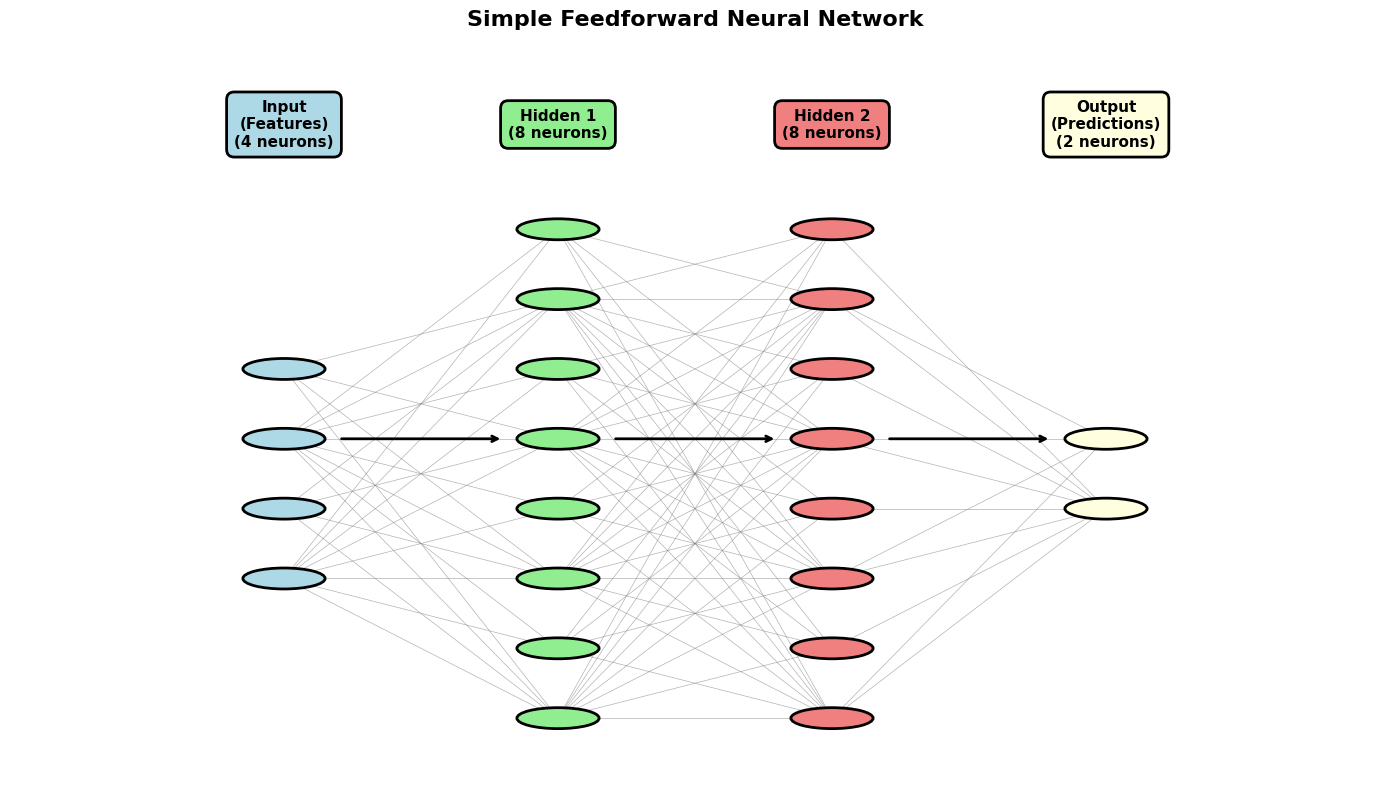

In [24]:
def visualize_neural_network(layer_sizes, layer_names=None, title="Neural Network Architecture"):
    """
    Visualize a neural network architecture.
    
    Args:
        layer_sizes: List of integers representing the number of neurons in each layer
        layer_names: Optional list of layer names
        title: Title for the plot
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Set up the plot
    ax.set_xlim(0, len(layer_sizes) + 1)
    ax.set_ylim(0, max(layer_sizes) + 2)
    ax.axis('off')
    
    # Colors for different layer types
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'plum']
    
    # Draw neurons and connections
    neuron_positions = []
    
    for layer_idx, layer_size in enumerate(layer_sizes):
        x = layer_idx + 1
        layer_positions = []
        
        # Calculate vertical spacing
        max_neurons_to_show = min(layer_size, 8)  # Show max 8 neurons
        y_start = (max(layer_sizes) - max_neurons_to_show) / 2 + 1
        
        for neuron_idx in range(max_neurons_to_show):
            y = y_start + neuron_idx
            layer_positions.append((x, y))
            
            # Draw neuron
            circle = plt.Circle((x, y), 0.15, color=colors[layer_idx % len(colors)], 
                              ec='black', linewidth=2, zorder=4)
            ax.add_patch(circle)
        
        # Add ellipsis if there are more neurons
        if layer_size > max_neurons_to_show:
            ax.text(x, y_start + max_neurons_to_show + 0.3, '...', 
                   ha='center', va='center', fontsize=16, fontweight='bold')
        
        neuron_positions.append(layer_positions)
        
        # Add layer label
        if layer_names and layer_idx < len(layer_names):
            label = f"{layer_names[layer_idx]}\n({layer_size} neurons)"
        else:
            label = f"Layer {layer_idx}\n({layer_size} neurons)"
        
        ax.text(x, max(layer_sizes) + 1.5, label, ha='center', va='center', 
               fontsize=11, fontweight='bold', 
               bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[layer_idx % len(colors)], 
                        edgecolor='black', linewidth=2))
    
    # Draw connections between layers
    for layer_idx in range(len(neuron_positions) - 1):
        current_layer = neuron_positions[layer_idx]
        next_layer = neuron_positions[layer_idx + 1]
        
        # Draw a subset of connections to avoid clutter
        for i, (x1, y1) in enumerate(current_layer):
            for j, (x2, y2) in enumerate(next_layer):
                # Only draw some connections to keep it clean
                if i % 2 == 0 or j % 2 == 0:
                    ax.plot([x1, x2], [y1, y2], 'gray', alpha=0.6, linewidth=0.5, zorder=1)
    
    # Add title
    ax.text(len(layer_sizes) / 2 + 0.5, max(layer_sizes) + 3.0, title, 
           ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Add arrows between layers
    for layer_idx in range(len(layer_sizes) - 1):
        x_arrow = layer_idx + 1.5
        y_arrow = max(layer_sizes) / 2 + 1
        ax.annotate('', xy=(x_arrow + 0.3, y_arrow), xytext=(x_arrow - 0.3, y_arrow),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    plt.tight_layout()
    plt.show()

# Example 1: Simple feedforward neural network
print("Example 1: Simple Feedforward Neural Network\n")
visualize_neural_network(
    layer_sizes=[4, 8, 8, 2],
    layer_names=['Input\n(Features)', 'Hidden 1', 'Hidden 2', 'Output\n(Predictions)'],
    title="Simple Feedforward Neural Network"
)

### Understanding the Visualization

In the diagram above:
- **Each circle** represents a neuron (a computational unit)
- **Lines between circles** represent connections (weights)
- **Information flows left to right**: Input → Hidden layers → Output

Each layer transforms the data:
1. **Input Layer (4 neurons)**: Receives the initial features (e.g., 4 characteristics of a student)
2. **Hidden Layer 1 (8 neurons)**: Learns complex patterns from the input
3. **Hidden Layer 2 (8 neurons)**: Learns even more abstract patterns
4. **Output Layer (2 neurons)**: Produces the final prediction (e.g., probability of joining two different clubs)

Example 2: Hypergraph Neural Network (Simplified CHESHIRE-style)



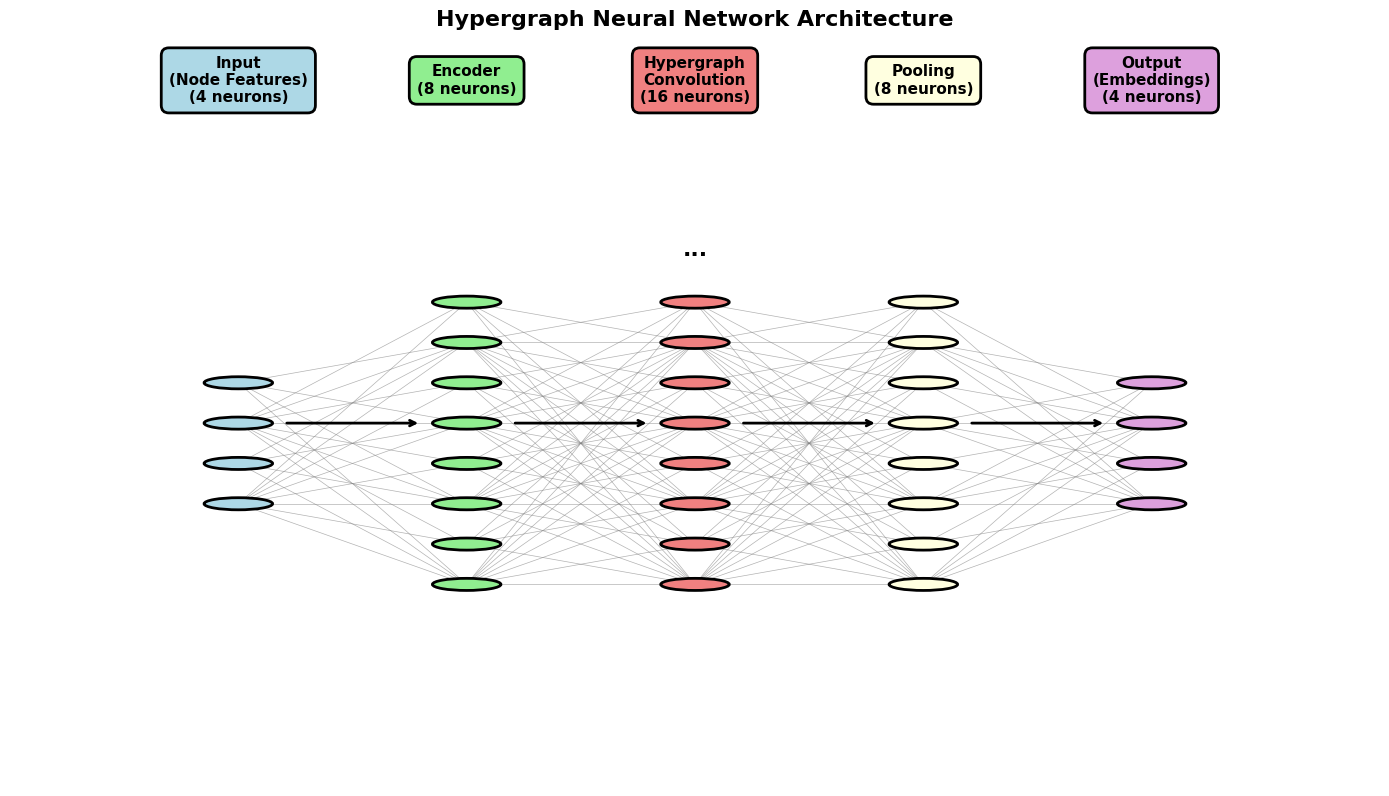

In [25]:
# Example 2: Hypergraph Neural Network Architecture
print("Example 2: Hypergraph Neural Network (Simplified CHESHIRE-style)\n")
visualize_neural_network(
    layer_sizes=[4, 8, 16, 8, 4],
    layer_names=['Input\n(Node Features)', 'Encoder', 'Hypergraph\nConvolution', 'Pooling', 'Output\n(Embeddings)'],
    title="Hypergraph Neural Network Architecture"
)

### The CHESHIRE Architecture (Conceptual)

The CHESHIRE algorithm uses a more sophisticated architecture:

1. **Input Layer**: Takes the incidence matrix and node features
2. **Encoder Layer**: Transforms raw features into a suitable representation
3. **Chebyshev Spectral Convolution Layers**: 
   - Uses spectral filters to capture multi-hop relationships
   - Multiple filters (K channels) capture different patterns
   - This is the "magic" that makes CHESHIRE powerful!
4. **Pooling Layer**: Aggregates information from multiple channels
5. **Scoring Layer**: Produces confidence scores for candidate hyperedges

Let's visualize a more detailed version:

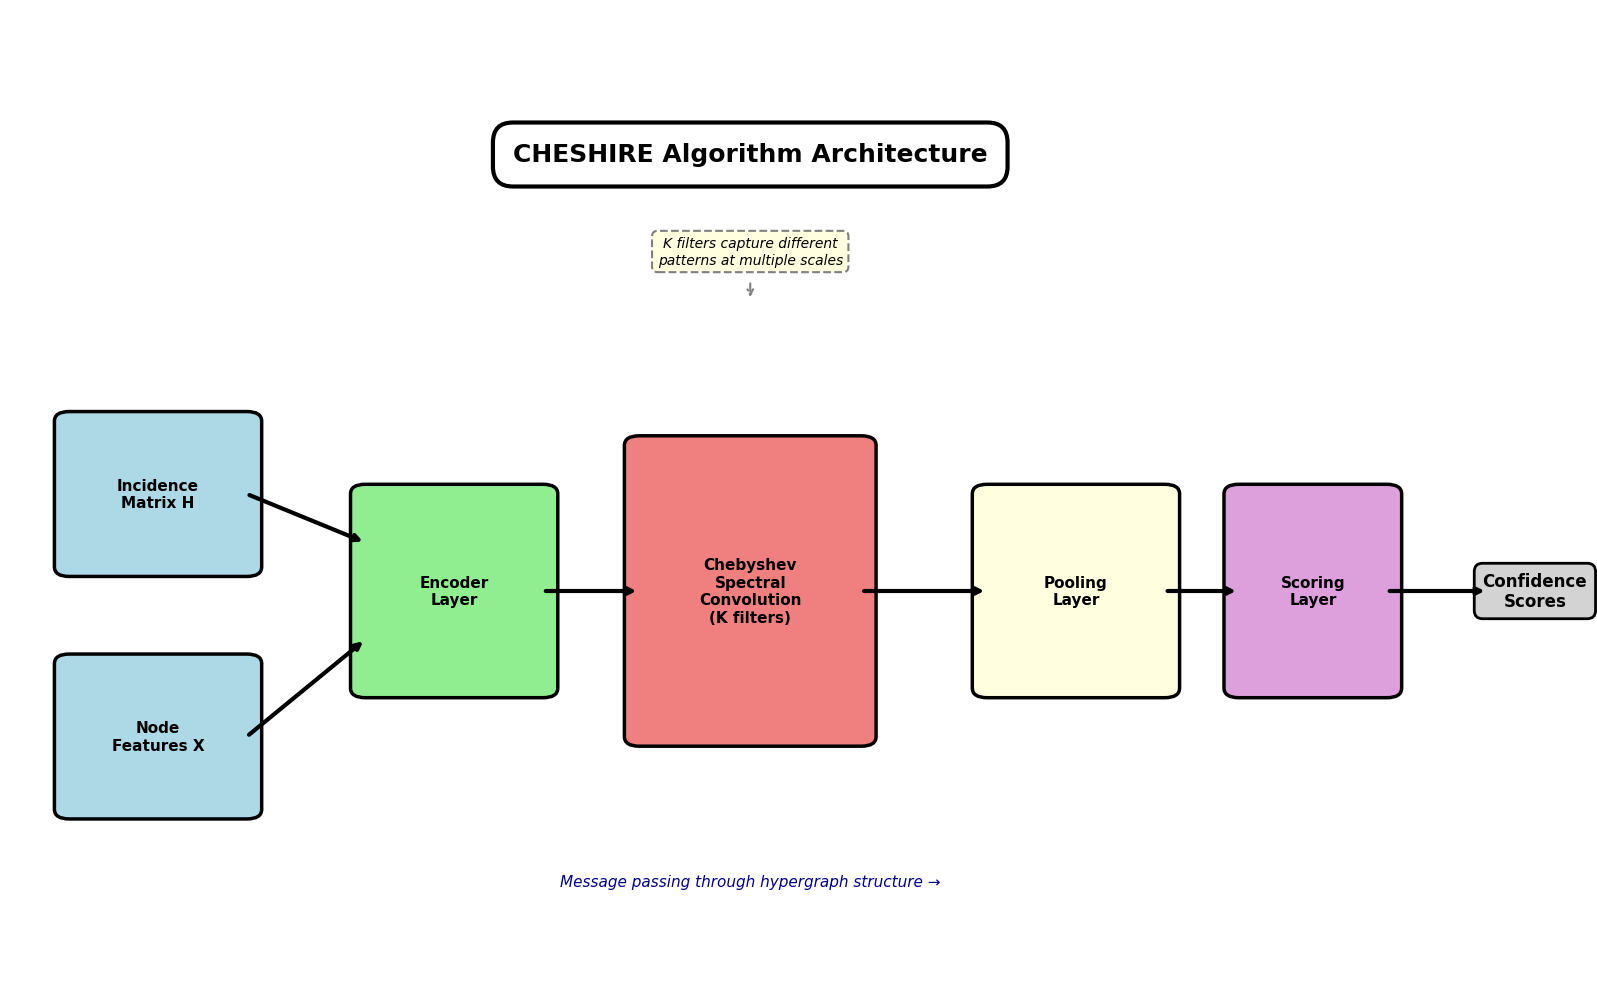


This is a simplified representation of the CHESHIRE architecture.
The actual implementation has additional details like normalization,
activation functions, and sophisticated scoring mechanisms.


In [26]:
# Visualize CHESHIRE-inspired architecture with more detail
def visualize_cheshire_architecture():
    """
    Create a detailed visualization of the CHESHIRE architecture.
    """
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Define boxes for each component
    components = [
        {'name': 'Incidence\nMatrix H', 'pos': (1, 5), 'size': (1.2, 1.5), 'color': 'lightblue'},
        {'name': 'Node\nFeatures X', 'pos': (1, 2.5), 'size': (1.2, 1.5), 'color': 'lightblue'},
        {'name': 'Encoder\nLayer', 'pos': (3, 4), 'size': (1.2, 2), 'color': 'lightgreen'},
        {'name': 'Chebyshev\nSpectral\nConvolution\n(K filters)', 'pos': (5, 4), 'size': (1.5, 3), 'color': 'lightcoral'},
        {'name': 'Pooling\nLayer', 'pos': (7.2, 4), 'size': (1.2, 2), 'color': 'lightyellow'},
        {'name': 'Scoring\nLayer', 'pos': (8.8, 4), 'size': (1.0, 2), 'color': 'plum'},
    ]
    
    # Draw components
    for comp in components:
        x, y = comp['pos']
        w, h = comp['size']
        rect = mpatches.FancyBboxPatch((x - w/2, y - h/2), w, h,
                                       boxstyle="round,pad=0.1",
                                       facecolor=comp['color'],
                                       edgecolor='black',
                                       linewidth=2.5)
        ax.add_patch(rect)
        ax.text(x, y, comp['name'], ha='center', va='center',
               fontsize=11, fontweight='bold', wrap=True)
    
    # Add Confidence Scores box (before arrows so arrows appear on top)
    ax.text(10.3, 4, 'Confidence\nScores', ha='center', va='center',
           fontsize=12, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray',
                    edgecolor='black', linewidth=2))
    
    # Draw arrows
    arrows = [
        ((1.6, 5), (2.4, 4.5)),
        ((1.6, 2.5), (2.4, 3.5)),
        ((3.6, 4), (4.25, 4)),
        ((5.75, 4), (6.6, 4)),
        ((7.8, 4), (8.3, 4)),
        ((9.3, 4), (9.98, 4)),
    ]
    
    for start, end in arrows:
        ax.annotate('', xy=end, xytext=start,
                   arrowprops=dict(arrowstyle='->', lw=3, color='black'))
    
    # Add title
    ax.text(5, 8.5, 'CHESHIRE Algorithm Architecture', ha='center', va='center',
           fontsize=18, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.8', facecolor='white',
                    edgecolor='black', linewidth=3))
    
    # Add annotations
    ax.text(5, 1, 'Message passing through hypergraph structure →', 
           ha='center', va='center', fontsize=11, style='italic', color='darkblue')
    
    # Add legend for Chebyshev filters
    ax.text(5, 7.5, 'K filters capture different\npatterns at multiple scales', 
           ha='center', va='center', fontsize=10, style='italic',
           bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow',
                    edgecolor='gray', linewidth=1.5, linestyle='dashed'))
    ax.annotate('', xy=(5, 7), xytext=(5, 7.2),
               arrowprops=dict(arrowstyle='->', lw=1.5, color='gray', linestyle='dashed'))
    
    plt.tight_layout()
    plt.show()

visualize_cheshire_architecture()
print("\nThis is a simplified representation of the CHESHIRE architecture.")
print("The actual implementation has additional details like normalization,")
print("activation functions, and sophisticated scoring mechanisms.")

### Key Architectural Insights

**Why Multiple Layers?**
- Each layer learns increasingly abstract representations
- Early layers capture local patterns (e.g., "Alice and Bob are in the same club")
- Deeper layers capture global patterns (e.g., "Students interested in sci-fi tend to also join film noir clubs")

**Why Chebyshev Spectral Convolution?**
- Traditional convolutions work well on grids (like images)
- Spectral convolutions work on irregular structures (like graphs and hypergraphs)
- Chebyshev polynomials make this computation efficient
- Multiple filters (K channels) capture different types of relationships

**The Power of Deep Learning:**
- The network **learns** which patterns are important from data
- No need to manually specify rules
- Can discover complex, non-obvious relationships

## Part 6: The CHESHIRE Algorithm for Hyperlink Prediction

### What is Hyperlink Prediction?

**Hyperlink prediction** is the task of predicting missing or future hyperedges in a hypergraph. For example:
- Which new club might a student join?
- Which students are likely to form a new study group?
- In biology: Which chemical reactions are missing from a metabolic network?

### Introducing CHESHIRE

**CHESHIRE** stands for **CHEbyshev Spectral HyperlInk pREdictor**. It's a state-of-the-art deep learning method for hyperlink prediction, developed specifically for predicting missing reactions in metabolic networks.

**Key Features of CHESHIRE:**
1. Uses **Chebyshev spectral graph convolutions** for efficient message passing
2. Works with **hypergraph topology alone** (no need for additional data)
3. Outputs **confidence scores** for candidate hyperedges

### How CHESHIRE Works (Simplified)

1. **Input**: A hypergraph (represented as an incidence matrix)
2. **Encoding**: Learn representations for nodes and hyperedges using spectral convolutions
3. **Scoring**: For each candidate hyperedge, compute a score based on learned representations
4. **Output**: Ranked list of candidate hyperedges (most likely to least likely)

### The Chebyshev Spectral Convolution

Without going into heavy mathematics, the Chebyshev spectral convolution is a **more efficient and powerful** way to do message passing. It uses polynomial filters that can capture multi-hop relationships in the hypergraph.

Think of it as: Instead of just looking at your immediate neighbors, you can also consider neighbors of neighbors, and so on, in a computationally efficient way.

### A Simplified CHESHIRE-Inspired Model

Let's build a simplified version to understand the core concepts. This won't be the full CHESHIRE algorithm, but it will give you the intuition.

In [27]:
class SimpleHypergraphConvLayer(nn.Module):
    """
    A simple hypergraph convolution layer.
    """
    def __init__(self, in_features, out_features):
        super(SimpleHypergraphConvLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, X, H):
        """
        Args:
            X: Node features (num_nodes x in_features)
            H: Incidence matrix (num_nodes x num_hyperedges)
        
        Returns:
            Updated node features (num_nodes x out_features)
        """
        # Node to hyperedge
        hyperedge_features = torch.matmul(H.T, X)
        hyperedge_sizes = H.sum(dim=0, keepdim=True).T
        hyperedge_features = hyperedge_features / (hyperedge_sizes + 1e-8)
        
        # Hyperedge to node
        X_aggregated = torch.matmul(H, hyperedge_features)
        node_degrees = H.sum(dim=1, keepdim=True)
        X_aggregated = X_aggregated / (node_degrees + 1e-8)
        
        # Apply linear transformation and activation
        X_out = self.linear(X_aggregated)
        X_out = F.relu(X_out)
        
        return X_out


class SimpleHyperlinkPredictor(nn.Module):
    """
    A simplified hyperlink prediction model inspired by CHESHIRE.
    """
    def __init__(self, in_features, hidden_features, out_features):
        super(SimpleHyperlinkPredictor, self).__init__()
        self.conv1 = SimpleHypergraphConvLayer(in_features, hidden_features)
        self.conv2 = SimpleHypergraphConvLayer(hidden_features, out_features)
    
    def forward(self, X, H):
        """
        Args:
            X: Initial node features (num_nodes x in_features)
            H: Incidence matrix (num_nodes x num_hyperedges)
        
        Returns:
            Node embeddings (num_nodes x out_features)
        """
        X = self.conv1(X, H)
        X = self.conv2(X, H)
        return X
    
    def predict_hyperedge_score(self, node_embeddings, candidate_nodes):
        """
        Predict the likelihood of a candidate hyperedge.
        
        Args:
            node_embeddings: Learned node embeddings (num_nodes x out_features)
            candidate_nodes: List of node indices forming the candidate hyperedge
        
        Returns:
            Score for the candidate hyperedge
        """
        # Get embeddings of nodes in the candidate hyperedge
        candidate_embeddings = node_embeddings[candidate_nodes]
        
        # Compute average embedding
        avg_embedding = candidate_embeddings.mean(dim=0)
        
        # Compute pairwise similarity (simplified scoring)
        similarities = []
        for i in range(len(candidate_nodes)):
            for j in range(i+1, len(candidate_nodes)):
                sim = F.cosine_similarity(
                    candidate_embeddings[i].unsqueeze(0),
                    candidate_embeddings[j].unsqueeze(0)
                )
                similarities.append(sim)
        
        if len(similarities) > 0:
            score = torch.stack(similarities).mean()
        else:
            score = torch.tensor(0.0)
        
        return score

# Create the model
model = SimpleHyperlinkPredictor(
    in_features=feature_dim,
    hidden_features=8,
    out_features=4
)

print("Model created successfully!")
print(model)

Model created successfully!
SimpleHyperlinkPredictor(
  (conv1): SimpleHypergraphConvLayer(
    (linear): Linear(in_features=4, out_features=8, bias=True)
  )
  (conv2): SimpleHypergraphConvLayer(
    (linear): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [28]:
# Let's use our model to get node embeddings
with torch.no_grad():  # No gradient computation (we're not training yet)
    node_embeddings = model(X_initial, H_tensor)

print("Learned Node Embeddings:")
print(node_embeddings)
print(f"\nShape: {node_embeddings.shape}")

Learned Node Embeddings:
tensor([[0.0000, 0.0000, 0.3469, 0.0290],
        [0.0000, 0.0000, 0.4034, 0.0391],
        [0.0000, 0.0000, 0.3469, 0.0290],
        [0.0000, 0.0000, 0.4427, 0.0486],
        [0.0000, 0.0000, 0.4068, 0.0419]])

Shape: torch.Size([5, 4])


### Predicting New Hyperedges

Now let's use our model to predict the likelihood of new clubs forming!

In [29]:
# Let's predict some candidate hyperedges
# Remember: nodes are indexed as: Alice=0, Bob=1, Charlie=2, David=3, Eve=4

candidate_hyperedges = [
    ([0, 3], "Alice & David Club"),  # Alice and David
    ([1, 2, 3], "Bob, Charlie & David Club"),  # Bob, Charlie, and David
    ([0, 1, 4], "Alice, Bob & Eve Club"),  # Alice, Bob, and Eve
    ([2, 3, 4], "Charlie, David & Eve Club"),  # Charlie, David, and Eve
]

print("Candidate Hyperedge Scores:\n")
print(f"{'Candidate Hyperedge':<35} {'Score':<10}")
print("-" * 45)

scores = []
with torch.no_grad():
    for candidate_nodes, name in candidate_hyperedges:
        score = model.predict_hyperedge_score(node_embeddings, candidate_nodes)
        scores.append((name, score.item()))
        print(f"{name:<35} {score.item():<10.4f}")

# Sort by score
scores.sort(key=lambda x: x[1], reverse=True)

print("\n" + "="*45)
print("Most Likely New Club:")
print(f"{scores[0][0]} (Score: {scores[0][1]:.4f})")

Candidate Hyperedge Scores:

Candidate Hyperedge                 Score     
---------------------------------------------
Alice & David Club                  0.9997    
Bob, Charlie & David Club           0.9998    
Alice, Bob & Eve Club               0.9999    
Charlie, David & Eve Club           0.9998    

Most Likely New Club:
Alice, Bob & Eve Club (Score: 0.9999)


### Understanding the Results

The model has learned to score different candidate hyperedges based on:
1. The structure of the existing hypergraph
2. The learned representations of nodes

Higher scores indicate that the candidate hyperedge is more likely to exist or form in the future.

**Note**: This is a simplified demonstration. The real CHESHIRE algorithm uses more sophisticated techniques like Chebyshev spectral filters, negative sampling, and advanced scoring mechanisms.

## Part 7: Real-World Applications

### Where is Hypergraph Learning Used?

Hypergraph learning and algorithms like CHESHIRE have many applications:

1. **Biology & Medicine**:
   - Predicting missing reactions in metabolic networks (CHESHIRE's original application)
   - Drug discovery and protein interaction networks
   - Understanding disease pathways

2. **Social Sciences**:
   - Analyzing group dynamics in social networks
   - Predicting collaboration patterns
   - Understanding community formation

3. **Recommendation Systems**:
   - Recommending groups or communities to users
   - Predicting user-item-context interactions

4. **Computer Vision**:
   - Image segmentation and object recognition
   - Scene understanding with multiple objects

5. **Natural Language Processing**:
   - Modeling multi-word expressions
   - Document classification with multiple topics

### The CHESHIRE Algorithm in Action

CHESHIRE was specifically designed for **genome-scale metabolic networks**:
- **Nodes**: Metabolites (chemical compounds)
- **Hyperedges**: Reactions (each reaction involves multiple metabolites)
- **Task**: Predict missing reactions to complete the metabolic network

It has been shown to outperform other methods and help improve our understanding of cellular metabolism!

## Part 8: A More Realistic Example - Collaboration Networks

Let's apply our knowledge to a more complex example: academic collaboration networks.

Collaboration Hypergraph:
Paper_1_Networks: {'Dr_B', 'Prof_A', 'PhD_C'}
Paper_2_ML: {'Dr_D', 'Prof_A', 'PhD_E'}
Paper_3_Sociology: {'Dr_B', 'PhD_C', 'Prof_F'}
Paper_4_DataScience: {'Dr_D', 'Dr_G', 'PhD_E'}
Paper_5_SocialNetworks: {'Dr_B', 'Dr_G', 'Prof_F'}


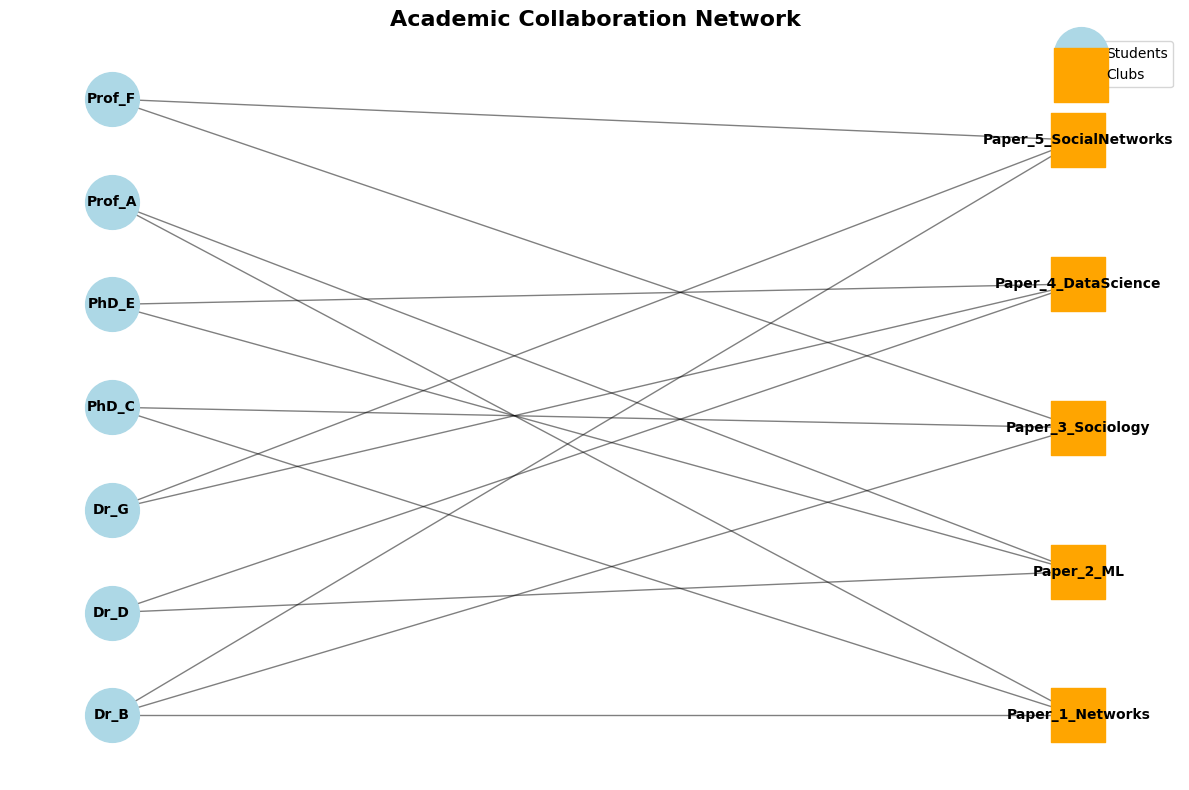

In [30]:
# Create a collaboration network hypergraph
# Nodes are researchers, hyperedges are papers (co-authorship)

collaboration_hypergraph = {
    'Paper_1_Networks': {'Prof_A', 'Dr_B', 'PhD_C'},
    'Paper_2_ML': {'Prof_A', 'Dr_D', 'PhD_E'},
    'Paper_3_Sociology': {'Dr_B', 'Prof_F', 'PhD_C'},
    'Paper_4_DataScience': {'Dr_D', 'PhD_E', 'Dr_G'},
    'Paper_5_SocialNetworks': {'Prof_F', 'Dr_B', 'Dr_G'},
}

print("Collaboration Hypergraph:")
for paper, authors in collaboration_hypergraph.items():
    print(f"{paper}: {authors}")

# Visualize
visualize_hypergraph(collaboration_hypergraph, "Academic Collaboration Network")

In [31]:
# Create incidence matrix for collaboration network
H_collab, researchers, papers = hypergraph_to_incidence_matrix(collaboration_hypergraph)
H_collab_tensor = torch.FloatTensor(H_collab)

print("Collaboration Network Incidence Matrix:")
print("\nResearchers:", researchers)
print("Papers:", papers)
print("\nMatrix:")
print(H_collab.astype(int))

Collaboration Network Incidence Matrix:

Researchers: ['Dr_B', 'Dr_D', 'Dr_G', 'PhD_C', 'PhD_E', 'Prof_A', 'Prof_F']
Papers: ['Paper_1_Networks', 'Paper_2_ML', 'Paper_3_Sociology', 'Paper_4_DataScience', 'Paper_5_SocialNetworks']

Matrix:
[[1 0 1 0 1]
 [0 1 0 1 0]
 [0 0 0 1 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 1 0 0 0]
 [0 0 1 0 1]]


In [32]:
# Initialize features for researchers (random for demonstration)
num_researchers = len(researchers)
researcher_features = torch.randn(num_researchers, 8)

# Create a new model for this network
collab_model = SimpleHyperlinkPredictor(
    in_features=8,
    hidden_features=16,
    out_features=8
)

# Get embeddings
with torch.no_grad():
    researcher_embeddings = collab_model(researcher_features, H_collab_tensor)

print("Researcher Embeddings:")
for i, researcher in enumerate(researchers):
    print(f"{researcher}: {researcher_embeddings[i][:4].numpy()}...")  # Show first 4 dimensions

Researcher Embeddings:
Dr_B: [0.         0.19662672 0.01502224 0.        ]...
Dr_D: [0.         0.18598332 0.07481866 0.        ]...
Dr_G: [0.         0.16238761 0.04905475 0.        ]...
PhD_C: [0.         0.212989   0.01276933 0.        ]...
PhD_E: [0.         0.18598332 0.07481866 0.        ]...
Prof_A: [0.         0.21662813 0.0464092  0.        ]...
Prof_F: [0.         0.18385875 0.01165208 0.        ]...


In [33]:
# Predict potential new collaborations
# Create a mapping from researcher names to indices
researcher_to_idx = {name: idx for idx, name in enumerate(researchers)}

candidate_collaborations = [
    (['Prof_A', 'Prof_F', 'Dr_G'], "Interdisciplinary AI & Society Paper"),
    (['Dr_B', 'Dr_D', 'PhD_E'], "Networks & ML Collaboration"),
    (['PhD_C', 'PhD_E'], "PhD Student Collaboration"),
    (['Prof_A', 'Dr_B', 'Prof_F'], "Senior Researchers Team"),
]

print("Predicted Collaboration Scores:\n")
print(f"{'Potential Collaboration':<45} {'Score':<10}")
print("-" * 55)

collab_scores = []
with torch.no_grad():
    for researcher_names, description in candidate_collaborations:
        # Convert names to indices
        candidate_indices = [researcher_to_idx[name] for name in researcher_names]
        score = collab_model.predict_hyperedge_score(researcher_embeddings, candidate_indices)
        collab_scores.append((description, score.item()))
        print(f"{description:<45} {score.item():<10.4f}")

# Sort and show most likely collaboration
collab_scores.sort(key=lambda x: x[1], reverse=True)

print("\n" + "="*55)
print("Most Likely Future Collaboration:")
print(f"{collab_scores[0][0]} (Score: {collab_scores[0][1]:.4f})")

Predicted Collaboration Scores:

Potential Collaboration                       Score     
-------------------------------------------------------
Interdisciplinary AI & Society Paper          0.9801    
Networks & ML Collaboration                   0.9637    
PhD Student Collaboration                     0.9434    
Senior Researchers Team                       0.9872    

Most Likely Future Collaboration:
Senior Researchers Team (Score: 0.9872)


## Part 9: Key Takeaways

### What We've Learned

1. **Hypergraphs** are a powerful generalization of graphs that can represent group interactions naturally.

2. **Hypergraph Neural Networks** use message passing to learn from the structure of hypergraphs.

3. **PyTorch** and **PyTorch Geometric** provide the tools we need to build and train hypergraph models.

4. **CHESHIRE** is a state-of-the-art algorithm for hyperlink prediction that uses Chebyshev spectral convolutions.

5. These techniques have **real-world applications** in biology, social sciences, recommendation systems, and more.

### The Bigger Picture

Hypergraph learning is not just for computer scientists! It's a tool that can help researchers in many fields:
- **Sociologists** can study group dynamics and community formation
- **Biologists** can understand complex biochemical networks
- **Economists** can model multi-party transactions
- **Political scientists** can analyze coalition formation

The key is recognizing when your data involves **group interactions** rather than just pairwise relationships.

## Part 10: Going Further

### Resources for Learning More

1. **PyTorch Geometric Documentation**: [https://pytorch-geometric.readthedocs.io/](https://pytorch-geometric.readthedocs.io/)

2. **CHESHIRE Paper**: Chen, C., Liao, C., & Liu, Y. Y. (2023). Teasing out missing reactions in genome-scale metabolic networks through hypergraph learning. *Nature Communications*, 14(1), 2375.

3. **CHESHIRE GitHub Repository**: [https://github.com/canc1993/cheshire-gapfilling](https://github.com/canc1993/cheshire-gapfilling)

4. **Hypergraph Neural Networks Tutorial**: [https://sites.google.com/view/hnn-tutorial](https://sites.google.com/view/hnn-tutorial)

5. **DeepHypergraph Library**: [https://github.com/iMoonLab/DeepHypergraph](https://github.com/iMoonLab/DeepHypergraph)

### Next Steps

1. **Try it yourself**: Apply hypergraph learning to your own data
2. **Explore PyTorch Geometric**: Learn about other graph and hypergraph layers
3. **Read the CHESHIRE paper**: Understand the full algorithm in detail
4. **Experiment with real datasets**: Find hypergraph datasets in your field of interest

### Questions?

Feel free to ask any questions about:
- Hypergraphs and their applications
- PyTorch and deep learning
- The CHESHIRE algorithm
- How to apply these techniques to your research

## Thank You!

I hope this tutorial has given you a solid introduction to hypergraph learning with PyTorch and the CHESHIRE algorithm.

Remember: The power of hypergraphs lies in their ability to naturally represent complex, multi-way relationships that are common in the real world.

**Happy learning!** 🎓